# Reducción de dimensionalidad. PCA: Principal Component Analysis

[Basado en "Aprende ML con Scikit-Learn...' de Aurélien Géron <a href="https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb">capítulo 8 </a>]

Muchos problemas de ML involucrarán muchas características por instancia. No solo todas estas características hacen que el entrenamiento sea extremadamente lento, sino que también pueden hacer que sea mucho más difícil para un método de optimización encontrar una buena solución.

Este problema se conoce como la **maldición de la dimensionalidad**. En un problema del mundo real, a menudo es posible reducir el número de características, con esto conseguimos convertir un problema imposible de abordar en uno manejable. 

El objetivo es eliminar la cantidad máxima de características y minimizar la pérdida de información relacionada con una tarea específica. Sin embargo, la reducción de la dimensionalidad siempre causará alguna pérdida de información. También hará que nuestro pipeline sea un poco más complejo y, por lo tanto, más difícil de mantener.

La reducción de la dimensionalidad generalmente se lleva a cabo para **acelerar el entrenamiento** y es extremadamente útil para la visualización de datos al proyectar los datos en un espacio de 2-3 dimensional.

La visualización de datos también es importante para comunicar nuestros hallazgos a personas que no son científicos de datos, en especial, a las personas que tomarán decisiones y que utilizarán los resultados.


# 1. La maldición de la dimensionalidad 

Estamos muy acostumbrados a vivir en tres dimensiones (4 si consideramos el tiempo), pero nos resulta complicado imaginar espacios de alta dimensión.

A medida que aumentan las dimensiones (o características) de los datos se vuelve más difícl encontrar patrones porque los datos se distribuyen de forma muy dispersa.  Cuantas más dimensiones tenga un conjunto de datos, mayor será el riesgo de sobreajuste.

# 2. Enfoques principales para la reducción de dimensionalidad

## 2.1. Proyección

En la mayoría de los problemas del mundo real, las instancias de entrenamiento no se extienden de manera uniforme a través de todas las dimensiones. Muchas características son casi constantes, mientras que otras están altamente correlacionadas. Como resultado, todas las instancias de entrenamiento quedan dentro (o cerca) de un subespacio con muchas menos dimensiones del espacio de alta dimensión.

Aquí tenemos un ejemplo:


<div style="text-align:center;">
    <img style="width:30%" src="img/img1.png" />
   </div>

Si proyectamos perpendicularmente cada instancia de entrenamiento en el subespacio, obtenemos un nuevo conjunto de datos 2D representado de la siguiente manera:

<div style="text-align:center;">
    <img style="width:30%" src="img/img2.png" />
</div>

## 2.2 Aprendizaje múltiple (de variedades)

Sin embargo, la proyección no siempre es el mejor enfoque para la reducción de la dimensionalidad. En muchos casos, el subespacio puede girar y girar como en el conjunto de datos de la estructura Swiss Roll.
<div style="text-align:center;">
    <img style="width:40%" src="img/img3.png" />
</div>
Proyectar en un plano sin más apretujaría distintas capas, probablemente conviene más desenrollarlo 
<div style="text-align:center;">
    <img style="width:40%" src="img/img4.png" />
</div>
Muchos algoritmos de reducción de dimensionalidad funcionan modelando la variedad en la que se encuentran las instancias de entrenamiento, esto se denomina "Aprendizaje de variedades" . Se basa en la "suposición múltiple", también llamada "hipótesis múltiple", que sostiene que la mayoría de los conjuntos de datos de alta dimensión del mundo real se encuentran cerca de una variedad de dimensiones mucho más bajas. 
Pero no siempre es así:
<div style="text-align:center;">
    <img style="width:40%" src="img/img5.png" />
</div>
Por ejemplo, en la fila inferior de la figura, el límite está en x1=5, se ve bien en 3D pero parece más complejo en la variedad desenrollada.

En definitiva, reducir la dimensionalidad de nuestro conjunto de datos acelerará el entrenamiento, pero no garantiza una solución más sencilla. Todo depende del conjunto de datos y de la tarea en cuestión.

# 3. PCA: Principal Component Analysis

El análisis de componentes principales es, con mucho, el algoritmo de reducción de dimensionalidad más popular.

PCA es un algoritmo sensible a la escala relativa de las variables originales.

El PCA fue inventado en 1901 por [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) como un análogo del teorema del eje principal en mecánica; Más tarde fue desarrollado de forma independiente y nombrado por [Harold Hotelling] (https://en.wikipedia.org/wiki/Harold_Hotelling) en la década de 1930.

Para aplicar PCA, primero, identificaremos el hiperplano que se encuentra más cerca de los datos y después proyectaremos en él los datos.

## 3.1. Preservar la varianza

Queremos elegir un hiperplano(subespacio de una dimensión menos que el espacio en que se encuentra) que conserve la mayor varianza dentro de los datos, es decir, que la nueva representación que hagamos siga reflejando la distribución original de los datos tanto como sea posible.

A continuación vamos a ver 3 intentos de proyecciones para 3 hiperplanos elegidos (eje 1D):

<div style="text-align:center;">
    <img style="width:50%" src="img/img6.png" />
</div>

**Parece razonable seleccionar el eje que conserva la máxima cantidad de varianza ya que lo más probable es que pierda menos información que otras proyecciones.**

Otra forma de justificar esta elección es que se trata del eje que minimiza la distancia cuadrática media entre los puntos originales y sus proyecciones en el eje elegido. Esta es la idea detrás de PCA.

## 3.2. Componentes Principales

**PCA identifica el eje que representa la mayor cantidad de varianza en el conjunto de entrenamiento. También encuentra un segundo eje, perpendicular al primero, que representa la mayor cantidad de varianza restante.**

Si estamos considerando un conjunto de datos de mayor dimensión, PCA también encontraría un tercer eje, un cuarto, un quinto, y así sucesivamente... (tantos ejes como el número de dimensiones en el conjunto de datos).

El `i`ésimo eje se denomina `i`ésimo **componente principal** de los datos.

Entonces, ¿cómo podemos encontrar los componentes principales de un conjunto de entrenamiento? Existe una técnica estándar de vectorización de matrices llamada *Descomposición de valores singulares (SVD)*. Esta técnica descompone el conjunto de entrenamiento $X$ en $X=U \Sigma V^T$, en este caso $V$ contiene los vectores unitarios que definen todos los componentes principales que buscamos:


$$V=
  \begin{pmatrix}
    \vert & \vert & \dots & \vert \\
    c_1 & c_2 & \dots & c_n \\
    \vert & \vert & \dots & \vert \\
  \end{pmatrix}
$$

Se pueden extraer los componentes principales de un dataset usando la implementación `svd` de numpy. Podemos ver la implementación en 
[13] https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb.

[En la imagen anterior los componentes principales serían c1 y c2]

PCA da por hecho que el conjunto de datos está centrado alrededor del origen. Las clases PCA de Scikit-Learn ya se ocupan de centrar los datos por nosotros. Si implementases PCA por tu cuenta o con otras librerías habría que centrarlos primero.  

## 3.3. Proyección para bajar a d dimensiones

Una vez identificados los componentes principales se puede reducir la dimensionalidad del conjunto de datos a d dimensiones proyectándolo en el hiperplano definido por los primeros d componentes principales. Esto se hace multiplicando la matriz X del conjunto de entrenamiento por la matriz $W_{d}$  (matriz que tiene las primeras d columnas de V).

$$X_{d-proj}=XW_d$$

## 3.4. Usando Scikit-Learn

Afortunadamente esto en Scikit-Learn es sencillo. Y la librería también se ocupa de centrar los datos automáticamente

In [1]:
import numpy as np   #crea un 3d dataset
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [ ]:
X #vemos que tiene 3 dimensiones

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

pca.components_  #aquí ya transformado solo con 2 dimensiones


array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

## 3.5. Ratio de varianza definida/explicada (Explained Variance Ratio)

Ahora vamos a mostrar el porcentaje de varianza explicada/definida por cada una de las variables/componentes de la muestra. (El porcentaje o ratio indica la proporción de la varianza del conjunto de datos que se encuentra a lo largo de cada componente principal).
Si probamos con nuestro ejemplo:


In [4]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

Este valor indica que utilizando las 2 primeras variables (sobre todo la primera que ya aporta un 76%) obtendríamos un 91% de la información que nos aporta el dataset. Esto lleva a pensar que un tercer componente llevaría poca información (9%)

In [5]:
1 - pca.explained_variance_ratio_.sum()

np.float64(0.09028309326742034)

##  3.6. Selección del número correcto de dimensiones

Deberíamos elegir la número de dimensiones que sumen una gran parte de la varianza que se encuentra dentro del conjunto de datos original  a menos que estemos reduciendo la dimensionalidad para visualizar los datos.

El siguiente ejemplo carga y divide el conjunto de datos MNIST(contiene imágenes de dígitos manuscritos) realiza análisis de componentes principales sin reducir la dimensionalidad y después calcula el número mínimo de dimensiones requeridas para preservar el 95% de la varianza del conjunto de entrenamiento. Fíjate que cada imagen tiene 28 pixels de alto *28 pixels de ancho = 784 características. 

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # ahora tenemos 154, 
#sumamos 1 porque argmax encuentra el índice del primer componente que al sumarse explica al menos el 95% de la varianza
#y queremos el número de componentes                                          

In [7]:
d

np.int64(154)

Ahora se podrían indicar el número de componentes (d) y volver a ejecutar PCA pero en vez de configurar el número de componentes con un valor especificamos el ratio de la varianza que queremos preservar

In [12]:
pca = PCA(n_components=0.95) 
X_reduced = pca.fit_transform(X_train)

In [13]:
pca.n_components_  #el número real de componentes se va a determinar durante el entrenamiento y se almacena en este atributo

np.int64(154)

Otra opción es trazar la varianza explicada como una función del número de dimensiones y ver cuándo deja de crecer deprisa.
<div style="text-align:center;">
    <img style="width:30%" src="img/img7.png" />
</div>
Habrá un codo en la curva, este sugiere un punto óptimo para elegir el número de componentes, después de ese punto agregar más componentes no mejora mucho la cantidad de varianza explicada. Con esto sabemos hasta donde podemos reducir sin perder mucha información.

Si se utiliza PCA como paso de preprocesamiento para una tarea de aprendizaje supervisado, se puede ajustar el número de dimensiones de igual forma que otro hiperparámetro. Lo vemos en el siguiente ejemplo con un RadomForest y utilizando RandomizedSearchCV tanto para análisis de componentes principales como para los hiperparámetros del RandomForest.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3,
                                random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [17]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': np.int64(475), 'pca__n_components': np.int64(57)}


No está mal...hemos reducido un conjunto de datos de 784 dimensiones(28*28) a muchas menos! [Revisa el documento de Aurélien [28]...a ver qué ocurre con SGDClassifier ...]

## EXTRA: PCA para compresión

Después de la reducción de dimensionalidad, el conjunto de entrenamiento ocupa mucho menos espacio.

También es posible descomprimir el conjunto de datos reducido a $784$ (en el caso de MNIST) aplicando **la transformación inversa de la proyección PCA**. Esto no nos devolverá los datos originales ya que el 5 % de la varianza se perdió durante la compresión, pero probablemente estará cerca del conjunto de datos original.

La distancia cuadrática media entre el conjunto de datos original y el conjunto de datos descomprimido se denomina "error de reconstrucción".

Con inverse_transform() podemos descomprimir el conjunto de datos

In [18]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

In [19]:
X_recovered = pca.inverse_transform(X_reduced)

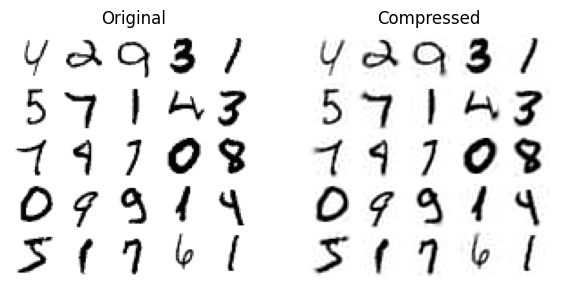

In [ ]:
import matplotlib.pyplot as plt     #simplemente para ver que se pierde poco en la calidad de la imagen
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

## EXTRA 2: PCA aleatorio

Podemos usar un algoritmo estocástico llamado *PCA aleatorio* que encuentra rápidamente una aproximación de los primeros $d$ componentes principales. Su complejidad computacional es $O(m \times d^{2})+O(d^3)$ en lugar de $O(m \times n^{2})+O(n^3)$ de SVD. Entonces es más rápido que SVD cuando $d << n$.


| Característica                      | **SVD**                             | **PCA aleatorio**                   |
|--------------------------------------|-------------------------------------|-------------------------------------|
| **Exactitud**                        | Exacto (calcula todos los valores propios y vectores propios) | Aproximación (estocástica, no exacta) |
| **Velocidad**                        | Más lento para grandes \(n\) (alto costo computacional) | Más rápido, especialmente cuando \(n\) es grande y \(d \ll n\) |
| **Complejidad computacional**        | \(O(m \times n^2) + O(n^3)\)         | \(O(m \times d^2) + O(d^3)\)         |
| **Aplicación típica**                | Cuando necesitas precisión y el conjunto de datos no es muy grande | Cuando el conjunto de datos es grande y quieres una solución rápida |
| **Resultado**                         | Componentes exactos (mejor precisión en la varianza explicada) | Componentes aproximados (más rápido pero menos preciso) |


Sería:

In [25]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [ ]:
X_reduced

## EXTRA 3: PCA incremental

Un problema con las implementaciones anteriores es que requieren que todos los datos de entrenamiento quepan en la memoria. Afortunadamente, se han desarrollado algoritmos de **PCA incremental** que permiten dividir el conjunto de entrenamiento en mini lotes y alimentarlos uno a uno a la vez al algoritmo IPCA. Esto es útil cuando se tienen conjuntos de entrenamiento grandes o se está ejecutando online.

PCA incremental usando scikit-learn:

In [23]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)


In [ ]:
X_reduced

## EXTRA 4 : OTRAS TÉCNICAS

Para conjuntos de datos con muchas dimensiones, el análisis de componentes principales puede ser demasiado lento. Si se trabaja con conjuntos de datos de decenas de miles de características o más(imágenes por ejemplo) se podría utilizar la **Proyección Aleatoria**. Además cuando los datos no siguen una distribución aproximadamente gaussiana (PCA asume que sí) también es una opción. 

En sklearn tenemos la clase *RandomProjection*, con 2 métodos:  GaussianRandomProjection y SparseRandomProjection.

Puedes ver algún ejemplo en [37-42] del documento de Aurélien.

**Locally Linear Embedding (LLE)** es una técnica de reducción de dimensionalidad no lineal. Intenta representar los datos en un espacio de menor dimensión, pero sin suponer que los datos se pueden describir de manera lineal (como en el caso de PCA).
LLE es útil cuando los datos están en un espacio no lineal, es decir, cuando no puedes usar simplemente una línea o un plano para describir las relaciones entre las muestras. Por ejemplo, puede funcionar bien cuando los datos tienen estructuras complejas como curvas o superficies en alta dimensión

Funcionamiento: 
Para cada punto en los datos, LLE encuentra los vecinos más cercanos. Esto se hace típicamente usando una distancia como la Euclidiana. Después intenta escribir cada punto como una combinación ponderada de sus vecinos cercanos.Luego LLE usa la información de las combinaciones lineales para mapear los puntos a un espacio de menor dimensión.
En scikit-learn, LocallyLinearEmbedding es una implementación de esta técnica LLE

Otras técnicas de reducción de dimensionalidad serían por ejemplo en sklearn: escalado multidimensional (MDS), Isomap, t-SNE, LDA.

Puedes ver un ejemplo de t-SNE en el ejercicio 10 del Notebook de Aurélien(08_dimensionality_reduction.ipynb)